<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/RandomForestClassifier_on_Coimbra_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

df = pd.read_csv('DB_dataR2_Coimbra.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [4]:
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [5]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,115.000000,116.000000,116.000000,116.000000,114.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.049904,2.694988,26.615080,10.180874,14.734438,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.103549,3.642043,19.183294,6.843341,12.440378,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.354500,0.917966,12.313675,5.474282,6.899263,269.978250,1.000000
50%,56.000000,27.662416,92.000000,6.030000,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.429500,2.857787,37.378300,11.815970,17.510310,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,116.0,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.0,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,115.0,10.049904,10.103549,2.432000,4.354500,6.030000,11.429500,58.460000
HOMA,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.0,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.0,10.180874,6.843341,1.656020,5.474282,8.352692,11.815970,38.040000
Resistin,114.0,14.734438,12.440378,3.210000,6.899263,10.827740,17.510310,82.100000
MCP.1,116.0,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
Classification,116.0,1.551724,0.499475,1.000000,1.000000,2.000000,2.000000,2.000000


In [7]:
df.describe(include='all')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,115.000000,116.000000,116.000000,116.000000,114.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.049904,2.694988,26.615080,10.180874,14.734438,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.103549,3.642043,19.183294,6.843341,12.440378,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.354500,0.917966,12.313675,5.474282,6.899263,269.978250,1.000000
50%,56.000000,27.662416,92.000000,6.030000,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.429500,2.857787,37.378300,11.815970,17.510310,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [75]:
X = df.drop(['Classification'], axis=1)

y = df['Classification']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [77]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((79, 9), (34, 9))

In [78]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [79]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age',
 'BMI',
 'Glucose',
 'Insulin',
 'HOMA',
 'Leptin',
 'Adiponectin',
 'Resistin',
 'MCP.1']

In [82]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Series([], dtype: float64)

In [83]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Series([], dtype: float64)

In [84]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()


Series([], dtype: float64)

In [85]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7941


In [86]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7941


In [87]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [88]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Glucose        0.205838
BMI            0.138492
Age            0.137596
Resistin       0.111461
Adiponectin    0.110763
HOMA           0.104757
Leptin         0.065451
Insulin        0.065079
MCP.1          0.060563
dtype: float64

In [101]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(['HOMA'], axis=1)

X_test = X_test.drop(['HOMA'], axis=1)

In [102]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with HOMA variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with BMI variable removed : 0.4118


In [103]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 5 10]
 [10  9]]


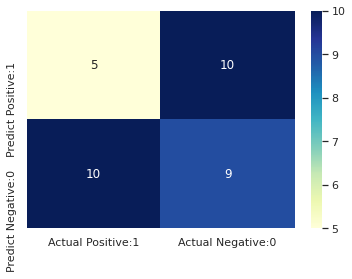

In [104]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33        15
           2       0.47      0.47      0.47        19

    accuracy                           0.41        34
   macro avg       0.40      0.40      0.40        34
weighted avg       0.41      0.41      0.41        34

